In [49]:
import pandas as pd
import seaborn as sns

In [34]:
gas_df = pd.read_csv("gas_usage.csv")
gas_df.head()

,invoice_date,period_start,period_end,usage_1_mj,usage_2_mj
0,11/03/19,11/01/19,08/03/19,354.01,NaN
1,13/05/19,09/03/19,09/05/19,807.61,137.14
2,10/07/19,10/05/19,09/07/19,835.90,3050.00
3,11/09/19,10/07/19,10/09/19,2132.13,3150.00
4,11/11/19,11/09/19,08/11/19,272.28,1735.77


# See data structure

In [35]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_date  27 non-null     object 
 1   period_start  27 non-null     object 
 2   period_end    27 non-null     object 
 3   usage_1_mj    27 non-null     float64
 4   usage_2_mj    12 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.2+ KB


In [36]:
gas_df.describe()

,usage_1_mj,usage_2_mj
count,27.000000,12.000000
mean,1175.040370,1628.225000
std,1182.614298,1461.603379
min,157.000000,0.000000
25%,300.785000,102.855000
50%,741.970000,1740.505000
75%,1661.240000,3062.500000
max,4563.000000,3322.000000


In [37]:
gas_df.isna().sum()

invoice_date     0
period_start     0
period_end       0
usage_1_mj       0
usage_2_mj      15
dtype: int64

Should add gaps and island check here

# Data wrangle

In [39]:
# Replace naN with 0
gas_df["usage_2_mj"] = gas_df["usage_2_mj"].fillna(0)
gas_df.isna().sum()

invoice_date    0
period_start    0
period_end      0
usage_1_mj      0
usage_2_mj      0
dtype: int64

In [38]:
# Change date columns to correct type
for col in gas_df[["invoice_date", "period_start", "period_end"]]:
    gas_df[col] = pd.to_datetime(gas_df[col], dayfirst=True)

gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_date  27 non-null     datetime64[ns]
 1   period_start  27 non-null     datetime64[ns]
 2   period_end    27 non-null     datetime64[ns]
 3   usage_1_mj    27 non-null     float64       
 4   usage_2_mj    12 non-null     float64       
dtypes: datetime64[ns](3), float64(2)
memory usage: 1.2 KB


In [41]:
# Add column for days in period
gas_df["period_days"] = (gas_df["period_end"] - gas_df["period_start"]).dt.days
gas_df["period_days"]

0     56
1     61
2     60
3     62
4     58
5     61
6     60
7     58
8     61
9     61
10    62
11    14
12    17
13    60
14    61
15    57
16    61
17    21
18    30
19     8
20    41
21     9
22    11
23    56
24    59
25    57
26    63
Name: period_days, dtype: int64

In [43]:
# Create total usage
gas_df["usage_total_mj"] = gas_df["usage_1_mj"] + gas_df["usage_2_mj"]
gas_df["usage_total_mj"]

0      354.01
1      944.75
2     3885.90
3     5282.13
4     2008.05
5      817.74
6      741.97
7     1833.03
8     6115.76
9     6004.34
10    2074.53
11     197.58
12     236.00
13     235.00
14     232.00
15    5060.00
16    4563.00
17     862.00
18    1254.00
19     392.00
20     706.00
21     157.00
22     235.00
23     429.00
24     740.00
25    3514.00
26    2390.00
Name: usage_total_mj, dtype: float64

# Analysis

In [46]:
# Usage per day
gas_df["mj_per_day"] = gas_df["usage_total_mj"]/gas_df["period_days"]

In [48]:
gas_df

,invoice_date,period_start,period_end,usage_1_mj,usage_2_mj,period_days,usage_total_mj,mj_per_day
0,2019-03-11,2019-01-11,2019-03-08,354.01,0.00,56,354.01,6.321607
1,2019-05-13,2019-03-09,2019-05-09,807.61,137.14,61,944.75,15.487705
2,2019-07-10,2019-05-10,2019-07-09,835.90,3050.00,60,3885.90,64.765000
3,2019-09-11,2019-07-10,2019-09-10,2132.13,3150.00,62,5282.13,85.195645
4,2019-11-11,2019-09-11,2019-11-08,272.28,1735.77,58,2008.05,34.621552
5,2020-01-10,2019-11-09,2020-01-09,817.74,0.00,61,817.74,13.405574
6,2020-03-11,2020-01-10,2020-03-10,741.97,0.00,60,741.97,12.366167
7,2020-05-11,2020-03-11,2020-05-08,1584.48,248.55,58,1833.03,31.603966
8,2020-07-13,2020-05-09,2020-07-09,3015.76,3100.00,61,6115.76,100.258361
9,2020-09-10,2020-07-10,2020-09-09,2954.34,3050.00,61,6004.34,98.431803


<AxesSubplot:xlabel='period_start', ylabel='mj_per_day'>

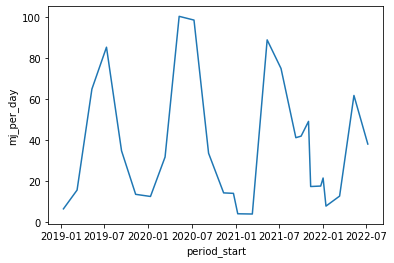

In [60]:
sns.lineplot(data=gas_df, x="period_start", y="mj_per_day")

<AxesSubplot:xlabel='period_start', ylabel='mj_per_day'>

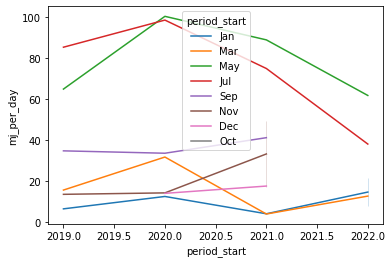

In [59]:
sns.lineplot(data=gas_df,
             # year
             x=pd.DatetimeIndex(gas_df["period_start"]).year,
             y="mj_per_day",
            # month
            hue=gas_df["period_start"].dt.strftime('%b'))
